In [1]:
import os
import wandb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import cv2

In [2]:
# Путь к данным датасета dentasis v32i
path_to_data = "dentasis.v32i.yolov5pytorch/valid/"

dirs_list = os.listdir(path_to_data)

print(dirs_list)

['images', 'labels']


In [3]:
images_list = os.listdir(path_to_data + dirs_list[0])

labels_list = os.listdir(path_to_data + dirs_list[1])

print(images_list[:5])
print()
print(labels_list[:5])

['019_00178_10_a091_jpg.rf.491959cbf23538a8ce33fda1ef27f131.jpg', '019_00178_10_a091_jpg.rf.5e4ad6b0ef3525ee30c8d43c0e9db3f7.jpg', '020_00465_03_a091_jpg.rf.624dde3436332c2d885adc4aaf0219ba.jpg', '020_00465_09_a091_jpg.rf.d5b20c2c58c0558a663b27d58a3fd313.jpg', '020_00465_09_a091_jpg.rf.e0d0db5641f9d311927b0cd2d35e8e23.jpg']

['019_00178_10_a091_jpg.rf.491959cbf23538a8ce33fda1ef27f131.txt', '019_00178_10_a091_jpg.rf.5e4ad6b0ef3525ee30c8d43c0e9db3f7.txt', '020_00465_03_a091_jpg.rf.624dde3436332c2d885adc4aaf0219ba.txt', '020_00465_09_a091_jpg.rf.d5b20c2c58c0558a663b27d58a3fd313.txt', '020_00465_09_a091_jpg.rf.e0d0db5641f9d311927b0cd2d35e8e23.txt']


In [6]:
# Функция для выбора класса по кариесу и перевода координат из COCO формата в человеческий.
# У всех изображений разрешение 640х640.
def compute_coordinates(file_name):
    
    coordinates_list = []
    image_width = 640
    image_height = 640
    with open(file_name, "r") as file:
        
        # итерация по строкам
        for line in file:
            coordinates = line.strip().split()
            coordinates = [float(element)*image_width for element in coordinates][1:]
            coordinates[0] = coordinates[0] - coordinates[2]/2
            coordinates[1] = coordinates[1] - coordinates[3]/2
            
            print(coordinates)
            coordinates_list.append(coordinates)
            
    file.close       
    
    return coordinates_list


# Функция для отрисовки баундинг боксов на изображениях. Нам нужно сделать наложение чтобы посмотреть качество разметки.
def draw_bbox(image_name, image, coord):
    
    im = Image.open(image_name)
    img = cv2.imread(image_name,1) 

    fig, ax = plt.subplots()
    ax.imshow(im)

    for box in coord:
        rect = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth=1, edgecolor='r', facecolor='none')
        cv2.rectangle(img, (int(box[0]), int(box[1])), ( int(box[0] + box[2]), int(box[1] + box[3])), (0, 0, 255), 2) 
        ax.add_patch(rect)
    
    cv2.imwrite("dentasis_out_valid/" + image, img)
    plt.show()



    
           

[0.0, 238.0, 384.0, 388.0]


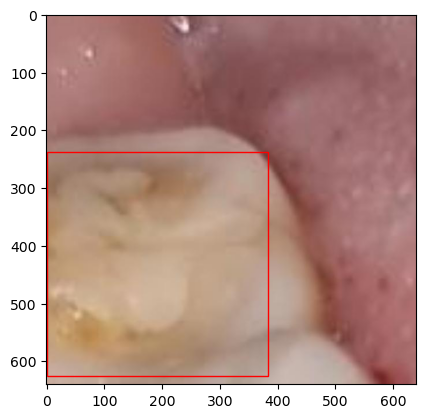

[461.0, 238.0, 178.0, 388.0]


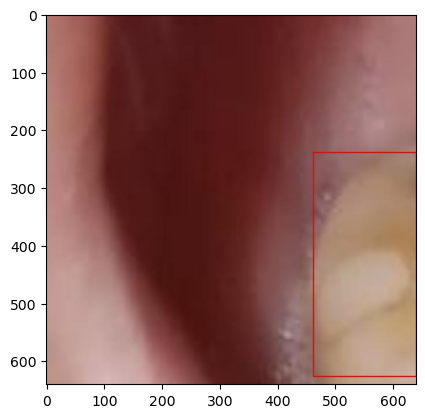

[205.0, 0.0, 166.0, 204.0]


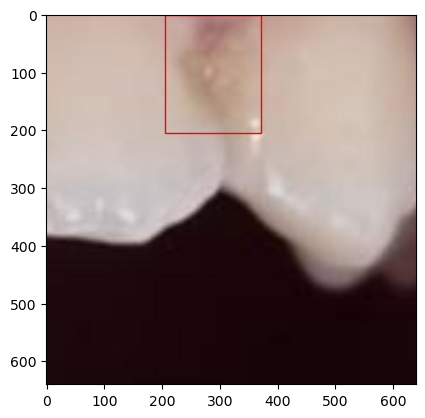

[99.0, 523.0, 98.0, 116.0]


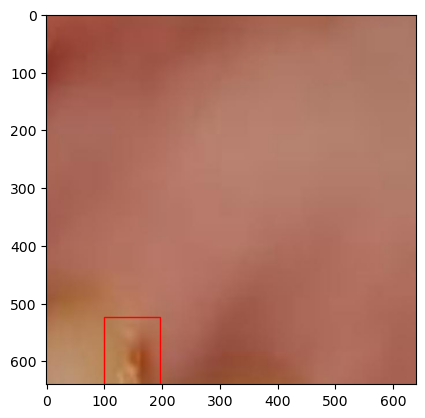

[99.0, 0.0, 98.0, 46.0]


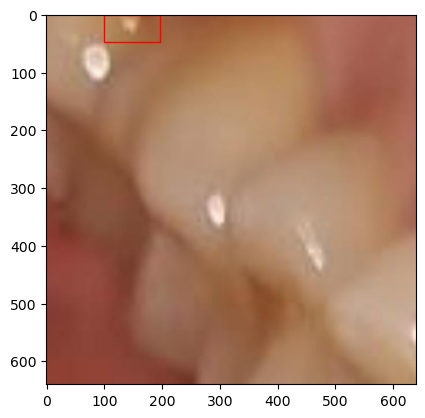

[86.0, 424.5, 100.0, 215.0]


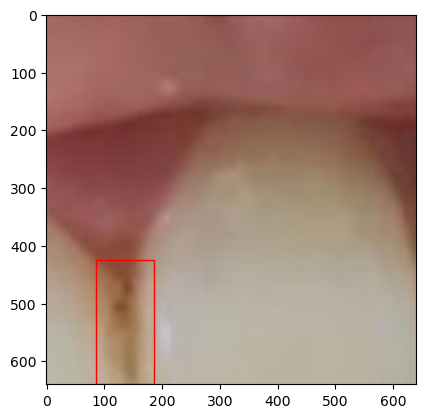

[448.0, 258.5, 96.0, 123.0]


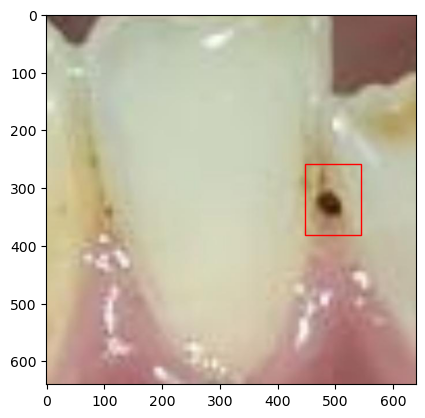

[283.0, 421.0, 46.0, 58.0]


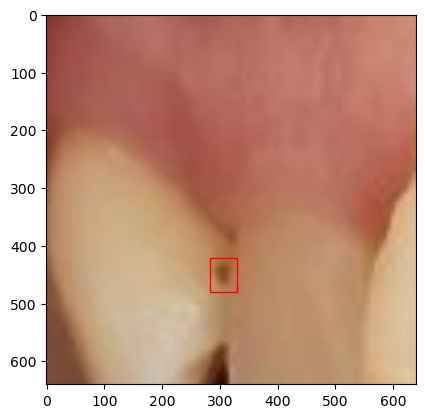

[431.0, 194.0, 208.0, 384.0]
[535.0, 0.0, 104.0, 46.0]


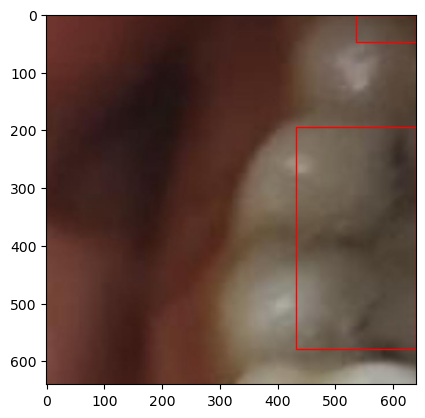

[535.0, 526.5, 104.0, 113.0]


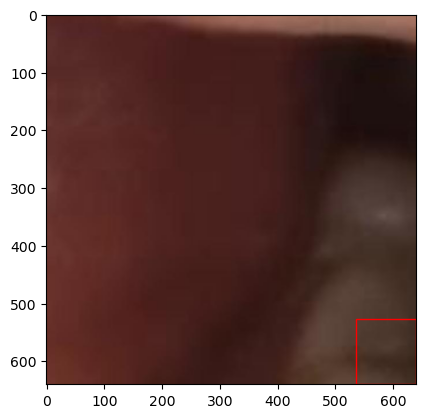

[407.0, 125.5, 144.0, 83.0]


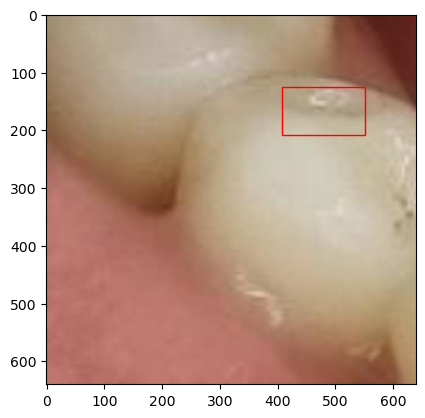

[77.0, 0.0, 266.0, 218.0]
[0.0, 349.0, 310.0, 290.0]


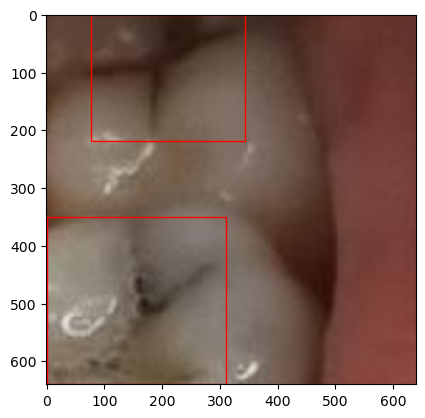

[77.0, 557.0, 266.0, 82.0]


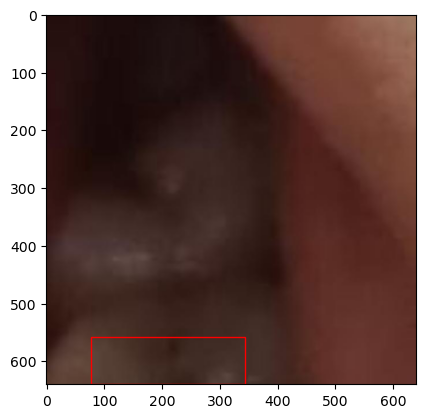

[0.0, 0.0, 310.0, 226.0]


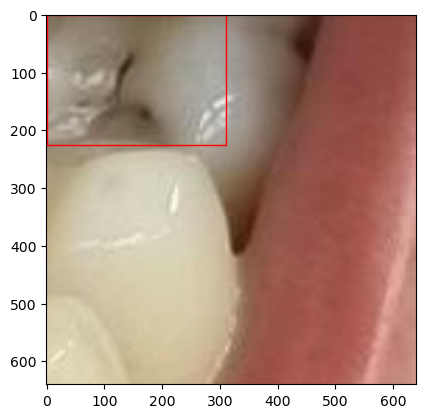

[560.0, 164.0, 80.0, 112.0]


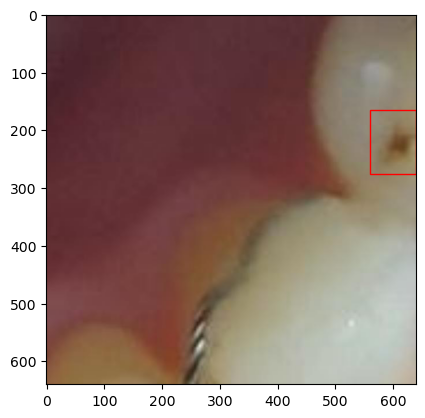

[0.0, 164.0, 32.0, 112.0]


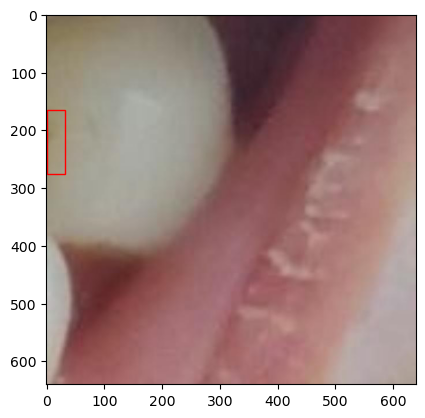

[292.0, 568.0, 176.0, 72.0]


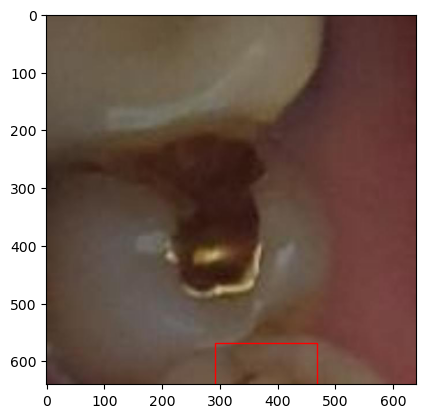

[292.0, 0.0, 176.0, 44.0]
[381.0, 145.0, 204.0, 156.0]


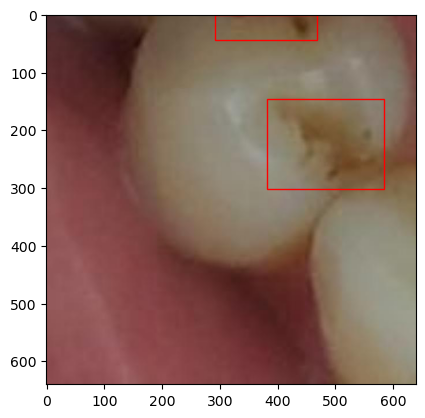

[45.5, 387.0, 101.0, 106.0]


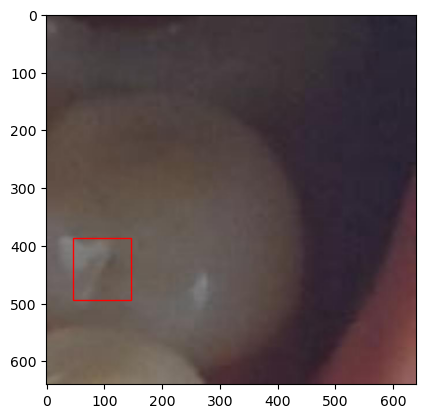

[0.0, 565.0, 34.0, 74.0]


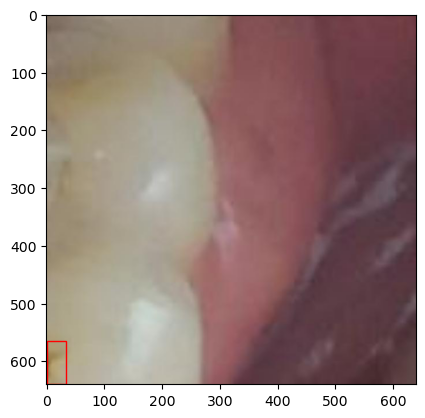

[578.5, 565.0, 61.0, 74.0]


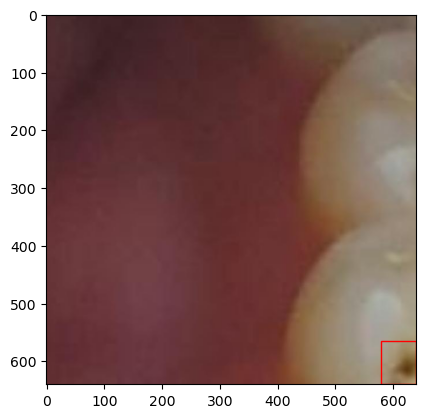

[91.5, 502.5, 59.0, 123.0]
[88.0, 113.5, 86.0, 201.0]


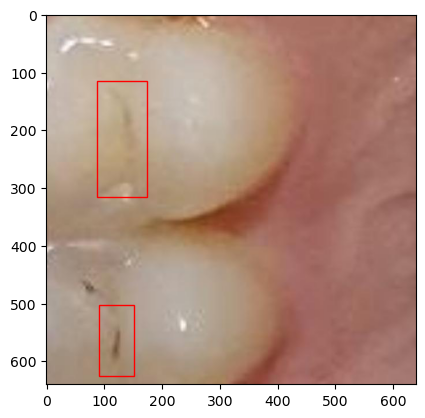

[249.0, 201.0, 152.0, 148.0]


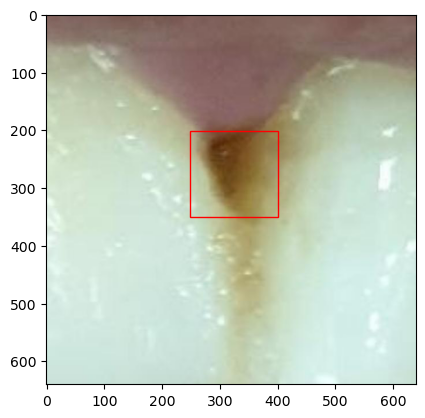

[440.5, 196.5, 97.0, 93.0]


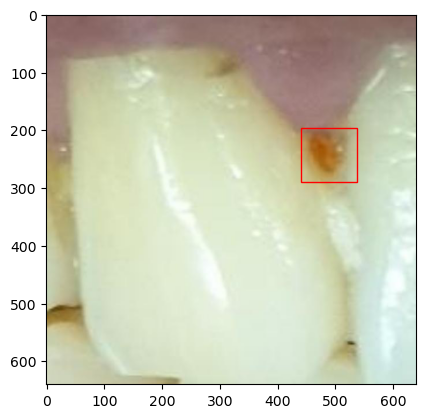

[210.5, 211.0, 87.0, 78.0]


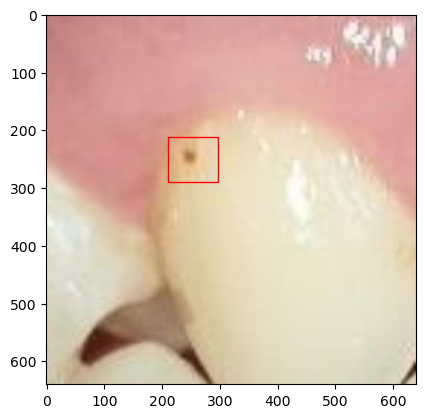

[164.5, 202.5, 109.0, 123.0]


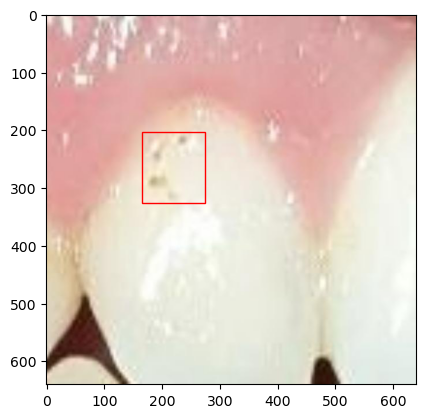

[533.0, 435.5, 80.0, 137.0]


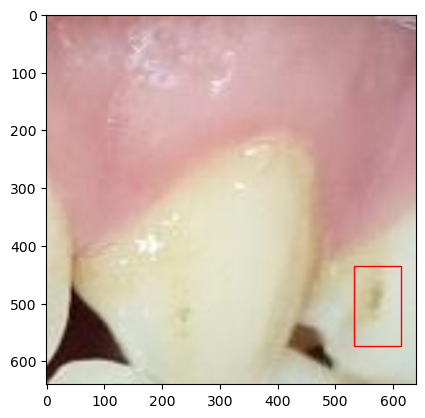

[213.0, 0.0, 302.0, 216.0]
[151.0, 293.0, 344.0, 234.0]


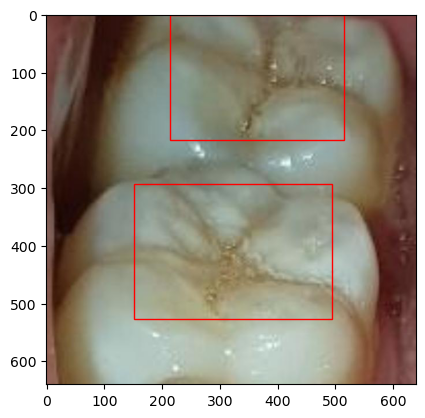

[281.0, 422.0, 70.0, 84.0]
[281.5, 537.0, 127.0, 102.0]


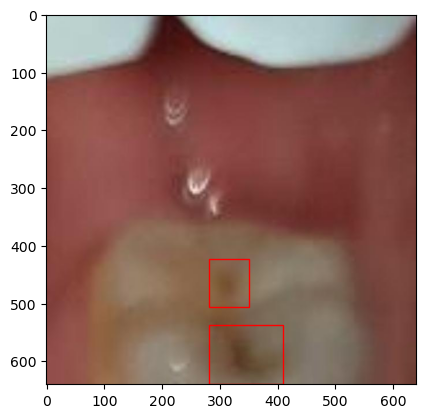

[327.0, 294.5, 308.0, 257.0]


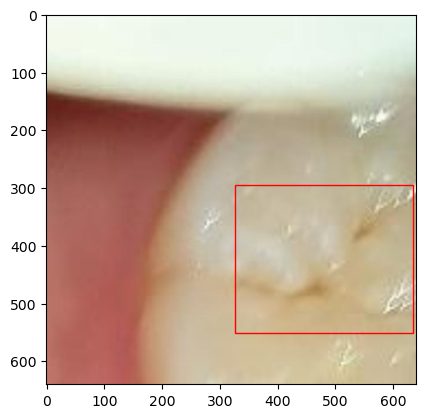

[514.0, 632.5, 118.0, 7.0]
[167.0, 0.0, 160.0, 72.0]
[268.0, 157.5, 118.0, 85.0]


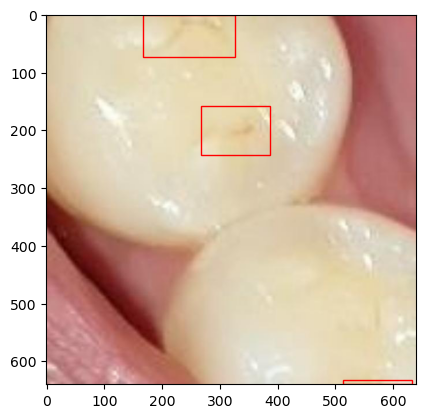

[167.0, 609.0, 160.0, 30.0]


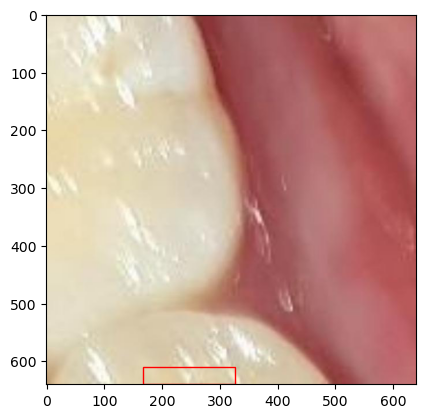

[356.0, 265.0, 122.0, 80.0]
[332.0, 431.0, 146.0, 76.0]


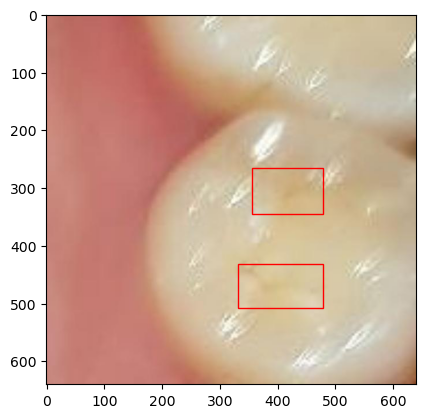

[514.0, 0.0, 118.0, 102.0]


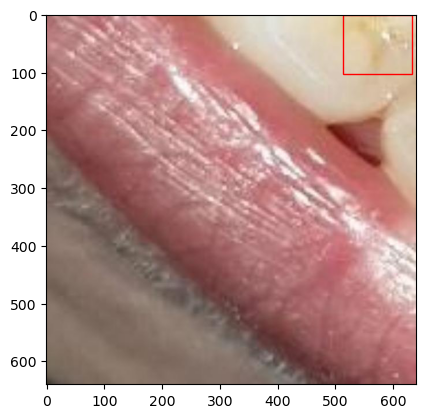

[0.0, 176.0, 44.0, 77.0]


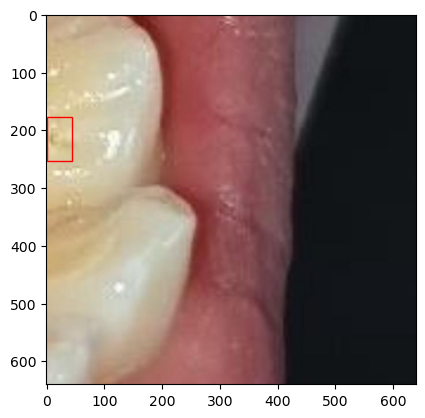

[411.5, 534.0, 81.0, 50.0]


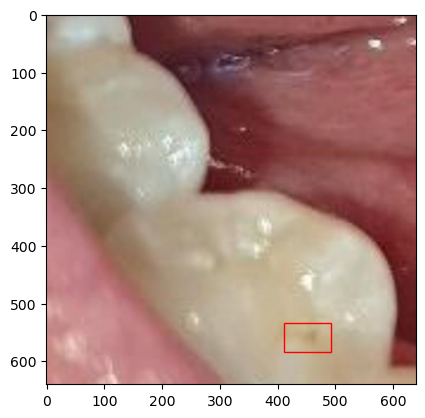

[619.0, 176.5, 20.0, 77.0]


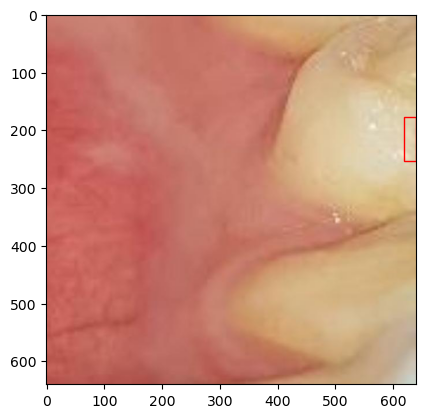

[274.5, 85.0, 103.0, 118.0]
[428.5, 403.5, 199.0, 145.0]


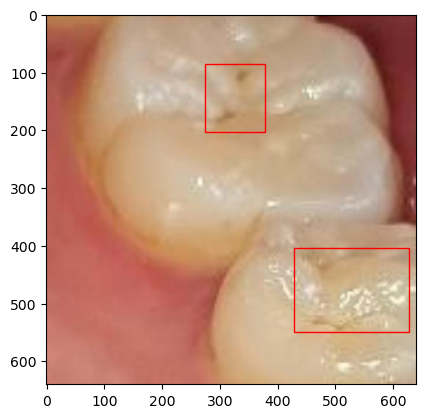

[346.5, 259.0, 91.0, 170.0]


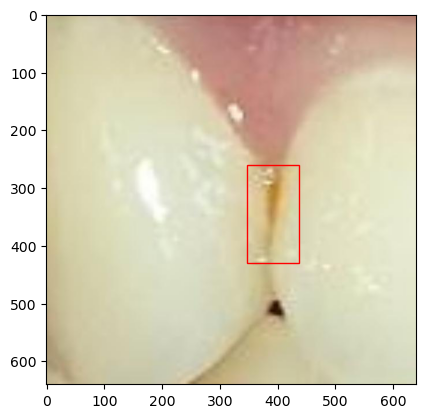

[288.0, 525.0, 64.0, 92.0]


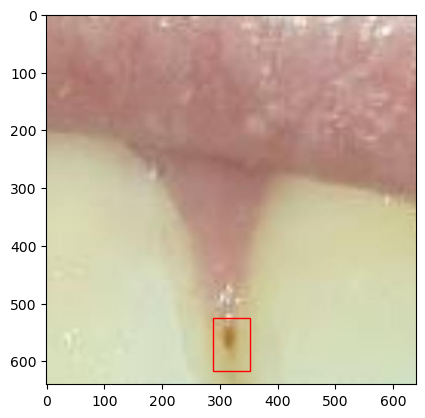

[44.5, 605.0, 73.0, 34.0]


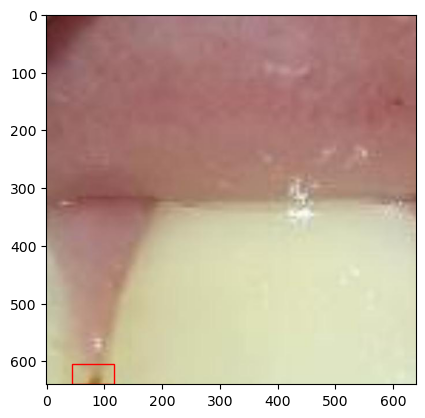

[44.0, 0.0, 73.0, 48.0]


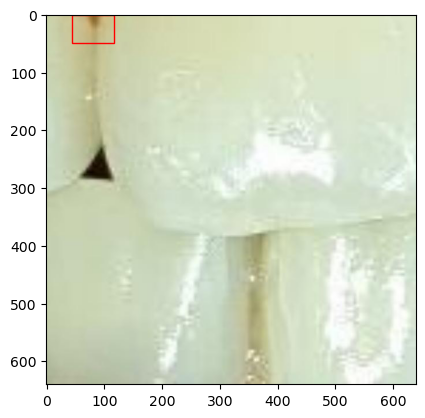

[196.0, 486.5, 416.0, 153.0]


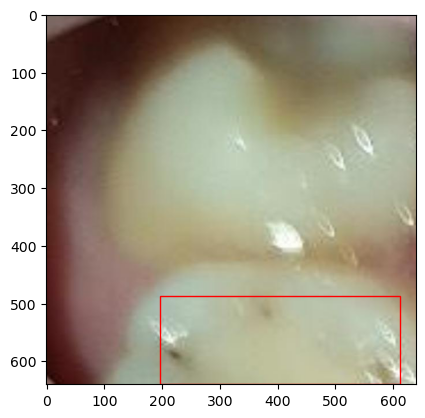

[581.0, 396.5, 58.0, 51.0]


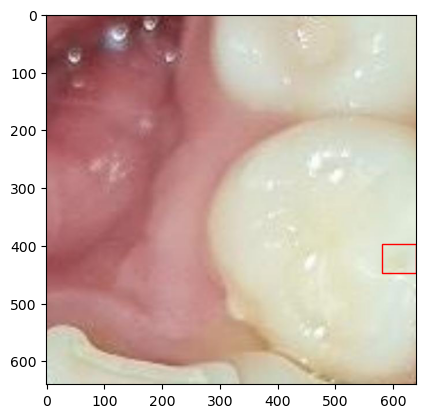

[502.5, 0.0, 137.0, 376.0]
[476.0, 535.0, 38.0, 34.0]


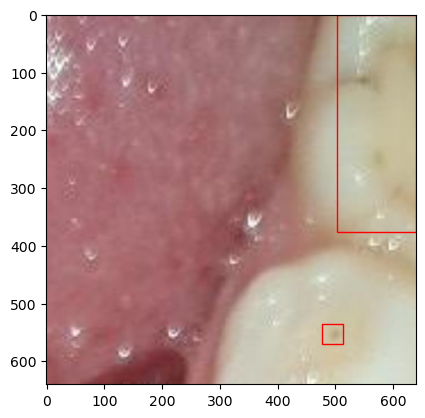

[196.0, 0.0, 416.0, 310.0]
[525.0, 495.5, 60.0, 61.0]


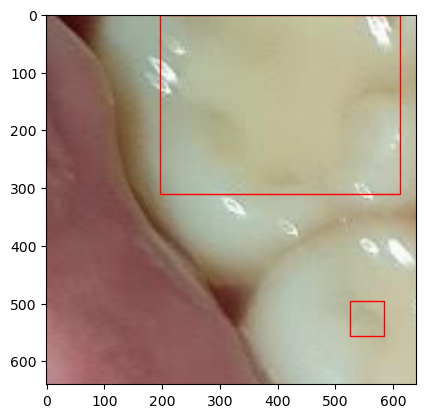

[0.0, 0.0, 388.0, 376.0]


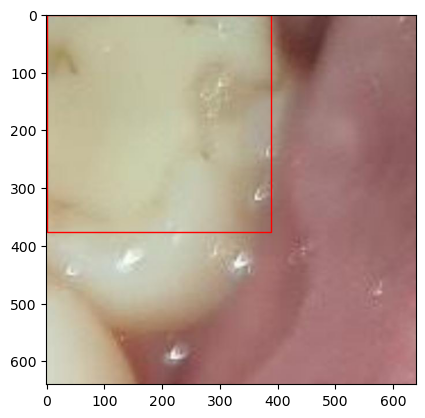

[104.5, 94.5, 75.0, 151.0]


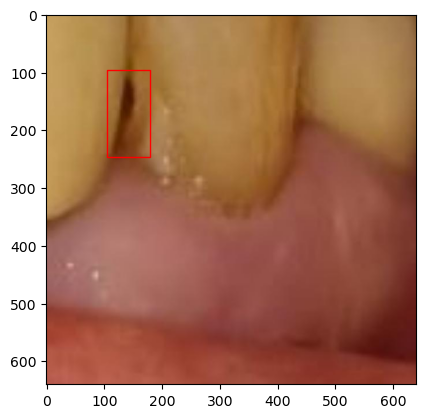

[496.0, 106.0, 96.0, 192.0]


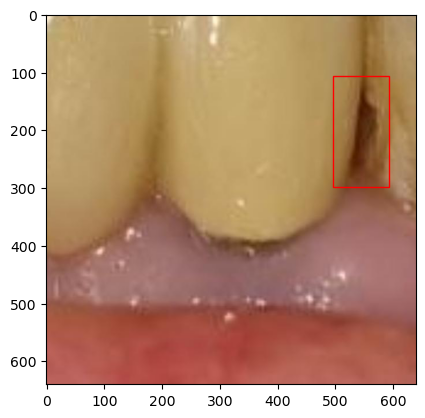

[0.0, 0.0, 162.0, 192.0]
[534.5, 0.0, 105.0, 26.0]


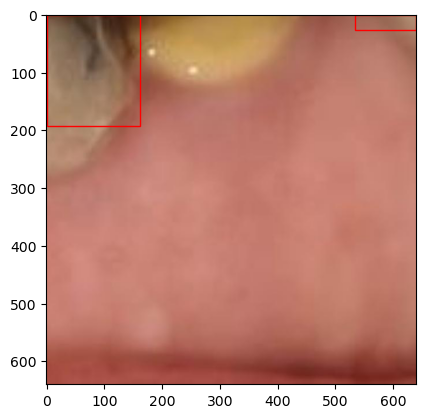

In [7]:
n = len(images_list)

for i in range(50):
    coordinates = compute_coordinates(path_to_data + dirs_list[1] + "/" + labels_list[i]) 
    draw_bbox(path_to_data + dirs_list[0] + "/" + images_list[i], images_list[i], coordinates)    

In [ ]:
# Подведем итоги изучения датасета dentasis v32i (в этот ноутбук попал анализ части валидационной выборки).
# Несовсем качественная разметка у датасета. Иногда рамки слишком большие. Иногда, как кариес отмечены дёсны или язык.
# Придётся либо самим размечать данные, либо брать несколько датасетов и из них выбирать изображения с качественной разметкой. 